# HW3: Classification

1) Load in the dataset https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv into a pandas dataframe


In [1]:
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert default and student to categorical variables.

In [2]:
df1 = df.replace({'default': {'No': 0, 'Yes': 1}})
df = df1.replace({'student': {'No': 0, 'Yes': 1}})
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of default labeled red if yes and blue if no.


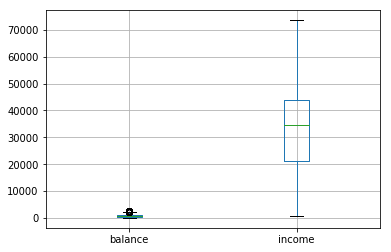

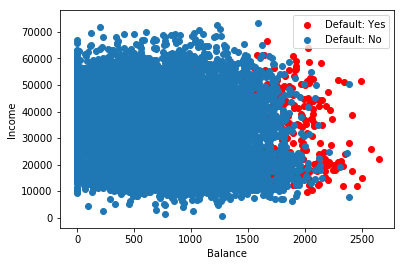

In [3]:
#Boxplots
df.boxplot(column=['balance','income'])
plt.show()

#Scatter plot
plt.figure()
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r', label='Default: Yes')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'], label='Default: No')
plt.ylabel('Income')
plt.xlabel('Balance')
plt.legend()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the balance and income variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

Coefficient of each feature: [[5.41235177e-03 1.59932076e-05]]
Training accuracy: 0.974
Test accuracy: 0.9723333333333334

Area under the curve of the ROC: 0.9450849244860237


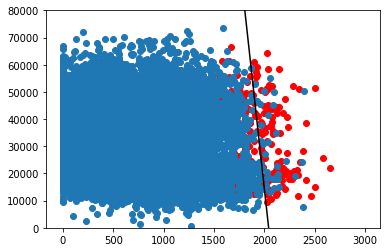

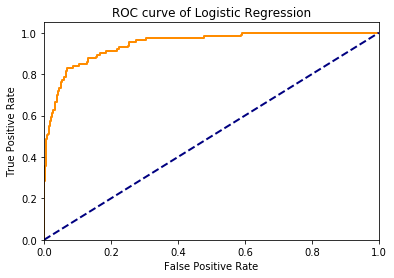

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

X = df.drop(['default', 'student'],axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(penalty='l1', C=1)    
clf.fit(X_train, y_train)

print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('');
    

#Scatter plot
plt.figure()
plt.ylim(0,80000)
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'])

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

pred = clf.predict_proba(X_test)

fpr, tpr, thres = roc_curve(y_test, pred[:,1])
print('Area under the curve of the ROC:',auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic Regression')
plt.show()

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients. How does performance improve with the added variable?

Coefficients: 
 [-8.90196586e-03  1.26075953e-04  7.06358539e-08]
Area under the curve of the ROC: 0.9456090929433438


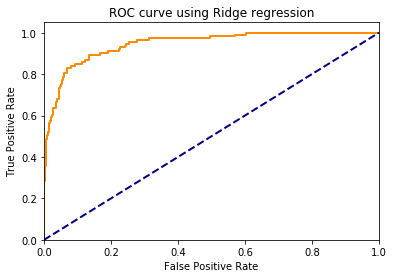

Text(0.5,0,'Student')

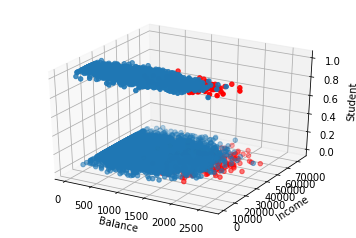

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge

X = df.drop(['default'],axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = Ridge(alpha=0.001)
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)

pred = regr.predict(X_test)

fpr, tpr, thres = roc_curve(y_test, pred)
print('Area under the curve of the ROC:',auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve using Ridge regression')
plt.show()

#Scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[X.columns[1]]
ys = X[X.columns[2]]
zs = X[X.columns[0]]

ax.scatter(xs[y==1],ys[y==1],zs[y==1],color='r')
ax.scatter(xs[y==0],ys[y==0],zs[y==0])
plt.xlabel('Balance')
plt.ylabel('Income')
ax.set_zlabel('Student')


6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

C:\Users\Valentin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


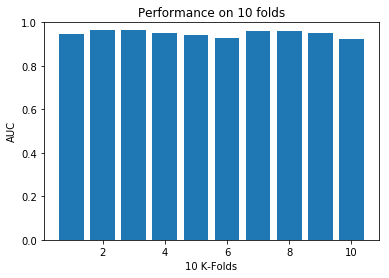

Mean AUC between all the K-Folds:  0.949146858048881
Std AUC between all the K-Folds:  0.013331475299823271


In [6]:
from sklearn.cross_validation import cross_val_score 
 
scores = cross_val_score(regr, X, y, cv=10, scoring='roc_auc')

plt.ylim([0,1])
plt.xlabel('10 K-Folds')
plt.ylabel('AUC')
plt.title('Performance on 10 folds')
plt.bar(range(1,11),scores)
plt.show()

print('Mean AUC between all the K-Folds: ',scores.mean())
print('Std AUC between all the K-Folds: ',scores.std())

The model built in 5) is robust because we can see that for all the folds the AUC is similar. This result is confirmed by checking the standard deviation which is very small.

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

Log Reg: Area under the curve of the ROC  0.9456090929433438
Dec Tree: Area under the curve of the ROC  0.9293905238925791


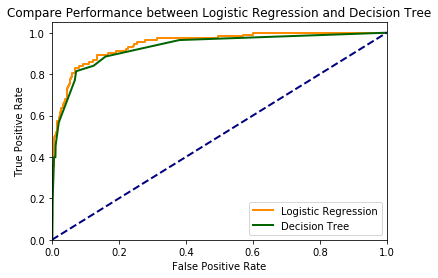

In [7]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,
                         filled=True, rounded=True,  
                         special_characters=True) 

Graph = graphviz.Source(data)

#Comparing the performance of Log Reg and Decision Tree

#Log Reg
pred = regr.predict(X_test)

fpr1, tpr1, thres1 = roc_curve(y_test, pred)
print('Log Reg: Area under the curve of the ROC ',auc(fpr1, tpr1))

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange',lw=2, label='Logistic Regression')

#Dec Tree
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)

fpr2, tpr2, thres2 = roc_curve(y_test, pred[:,1])
print('Dec Tree: Area under the curve of the ROC ',auc(fpr2, tpr2))

plt.plot(fpr2, tpr2, color='darkgreen',lw=2, label='Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Compare Performance between Logistic Regression and Decision Tree')
plt.legend(loc="lower right")
plt.show()

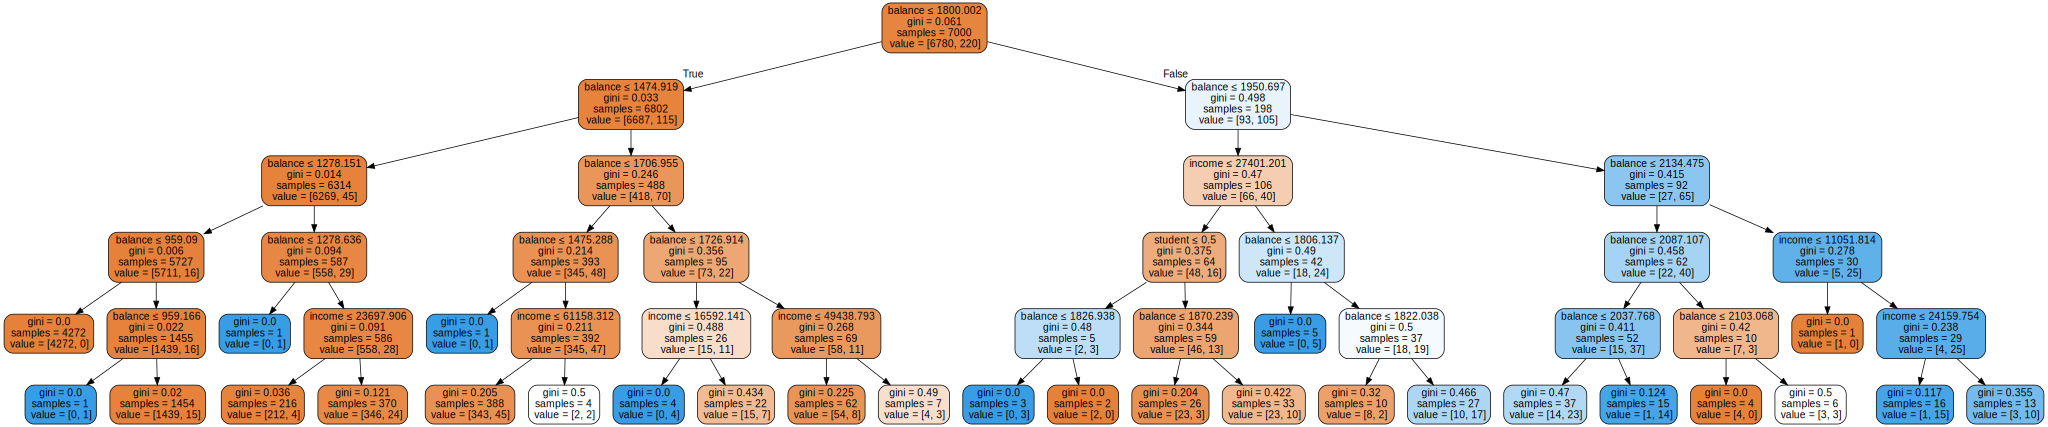

In [8]:
Graph

8) Find the optimal decision tree depth and compute the AUC ROC.

The optimal Decision Tree Depth is:  4
Area under the curve of the ROC: 0.936164864773734


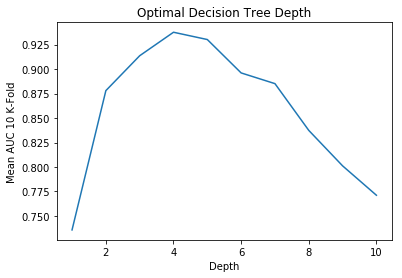

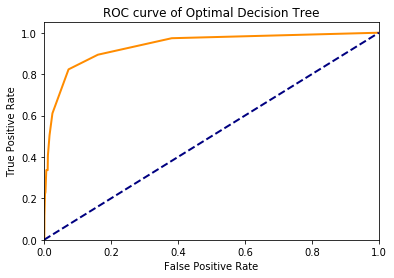

In [9]:
from sklearn.model_selection import train_test_split

scores=[]

depths = range(1,11)
for n in depths:
    regr = tree.DecisionTreeClassifier(max_depth=n)
    scores.append(cross_val_score(regr, X, y, cv=10, scoring='roc_auc').mean())

plt.figure()
plt.plot(depths, scores)
plt.xlabel('Depth')
plt.ylabel('Mean AUC 10 K-Fold')
plt.title('Optimal Decision Tree Depth')

opt_depth = scores.index(max(scores))+1

print('The optimal Decision Tree Depth is: ',opt_depth)

#AUC ROC of optimal depth

regr = tree.DecisionTreeClassifier(max_depth=opt_depth)
regr.fit(X_train, y_train)
pred = regr.predict_proba(X_test)

fpr, tpr, thres = roc_curve(y_test, pred[:,1])
print('Area under the curve of the ROC:',auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Optimal Decision Tree')
plt.show()